# ggplot

We start with `ggplot` as it best conveys the idea of the *grammar of graphics*.

In [20]:
!pip install plotnine

In [21]:
from plotnine import *
import pandas as pd

With ggplot, you start by binding the data to a ggplot object. This just gives an empty chart.

In [41]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

cars = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")

cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Next you define the mapping of your variables to perceivable aesthetics like the x position. This still does not draw any points, but already creates an axis label with appropriate limits.

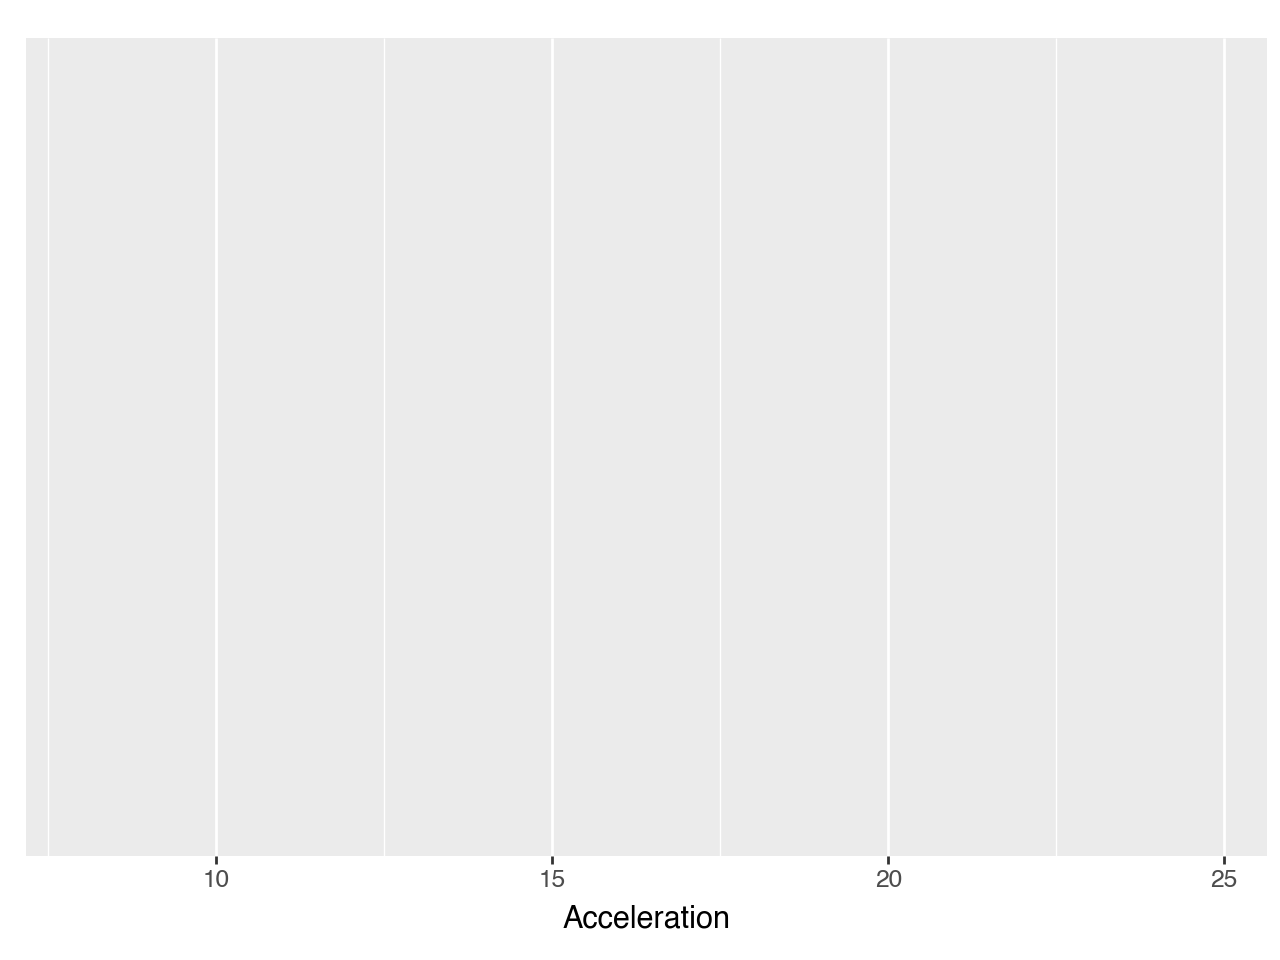

<Figure Size: (640 x 480)>

In [37]:
ggplot(cars, aes(x='Acceleration'))

The final part is to use some geometrical object, that gets calculated based on the mapping. ggplot does this by overriding the +-operator to add different geoms to the plot. Layer by layer. Once you understood this basic pattern, you have understood the grammar of graphics.

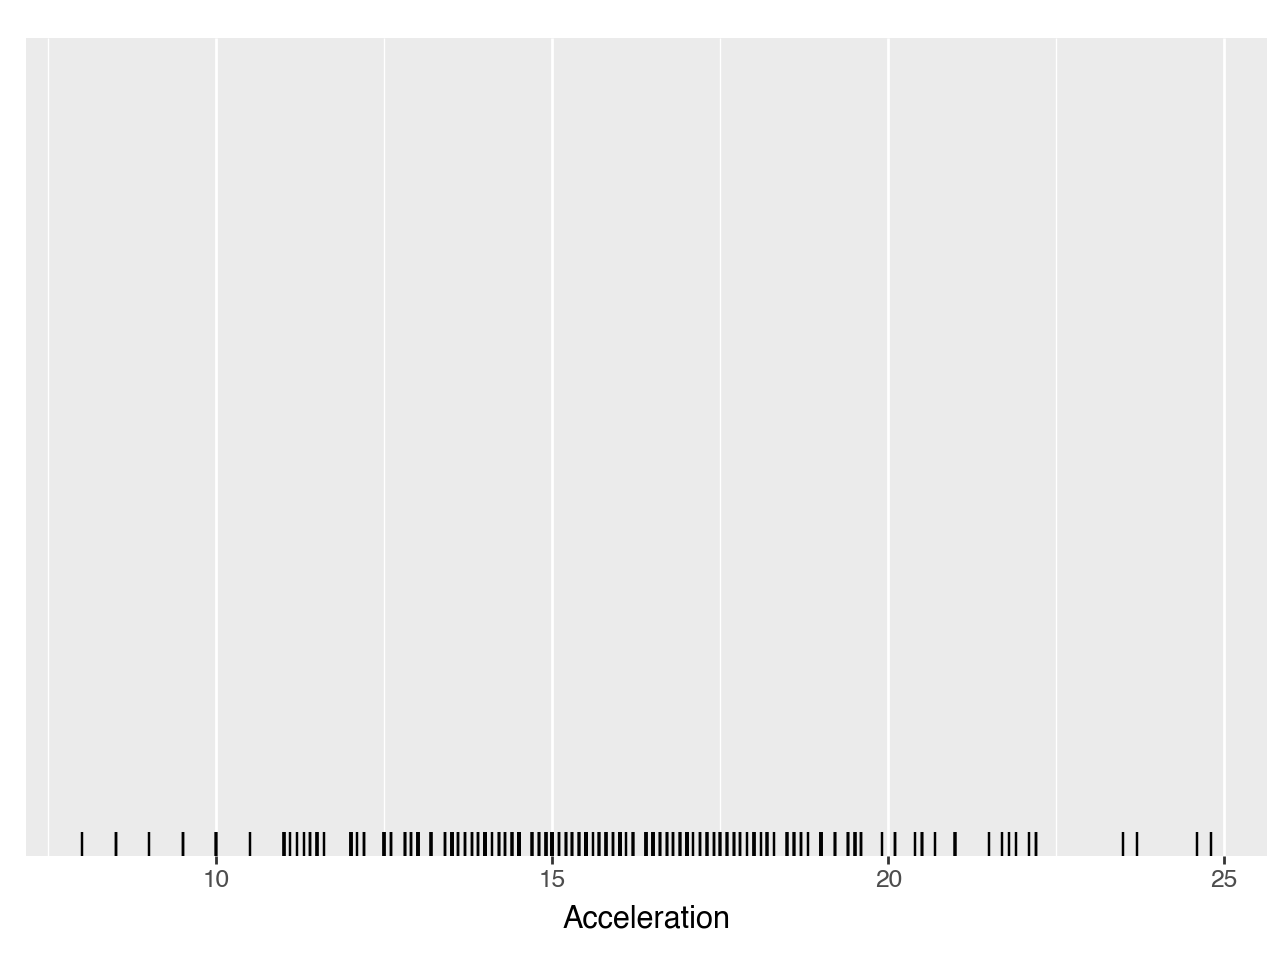

<Figure Size: (640 x 480)>

In [38]:
ggplot(cars, aes(x='Acceleration')) + geom_rug()

My recommandation for formating your ggplot code is to wrap the whole expresson in parantheses and then put each geom that you add on a separte line with the plus upfront. This way the code is very readable and you can simply comment out a single line to remove that layer from the plot, without touching the rest of the code.

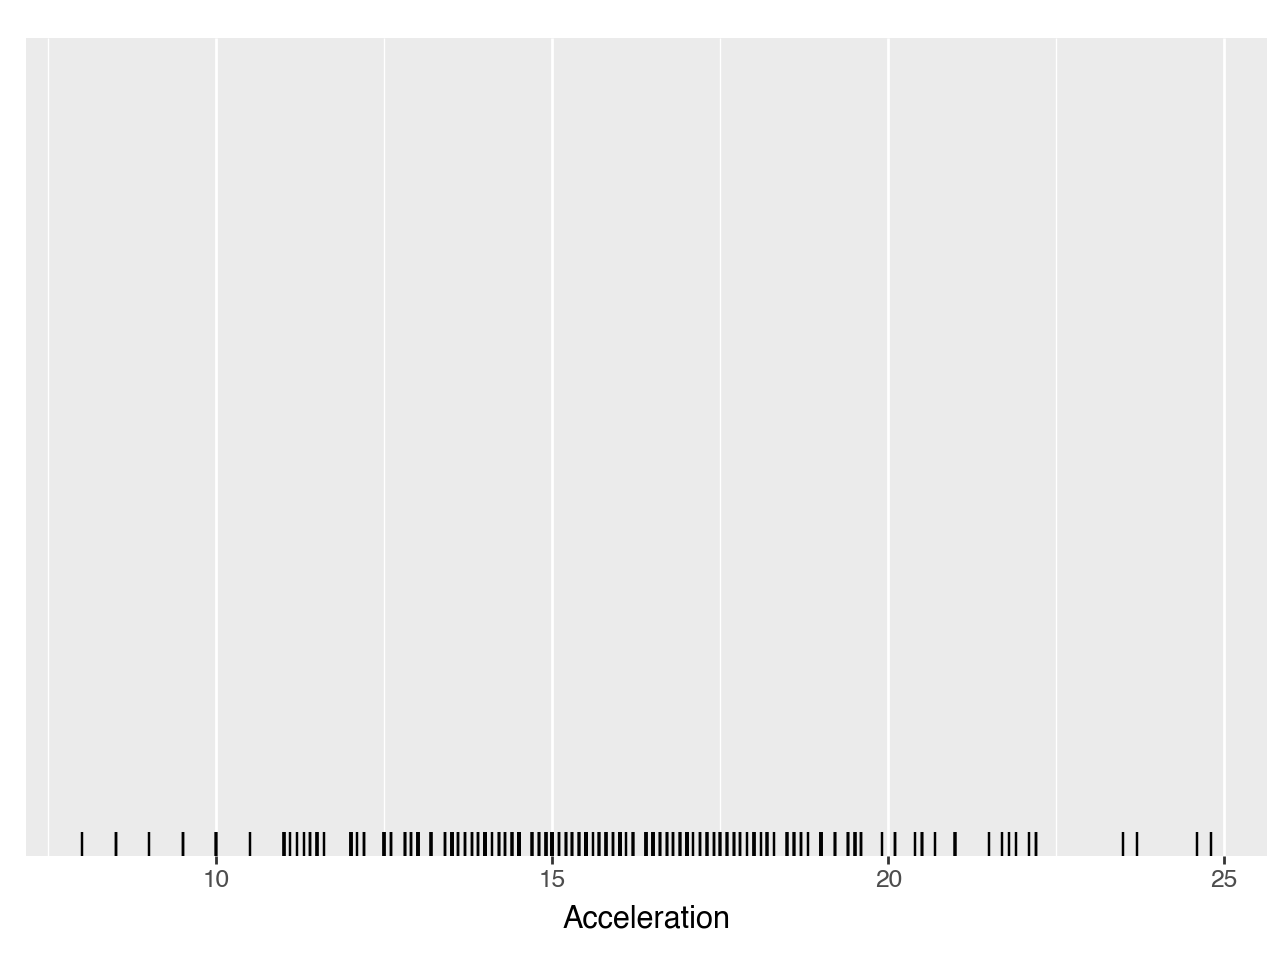

<Figure Size: (640 x 480)>

In [39]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_rug()
)

The power of the grammar of graphics is that you do not need to remember or search for a lot of configuration parameters of plotting functions. Instead, you can compose very complex plots out of simple expressions. For example, several geoms can be added to create more complex plots.

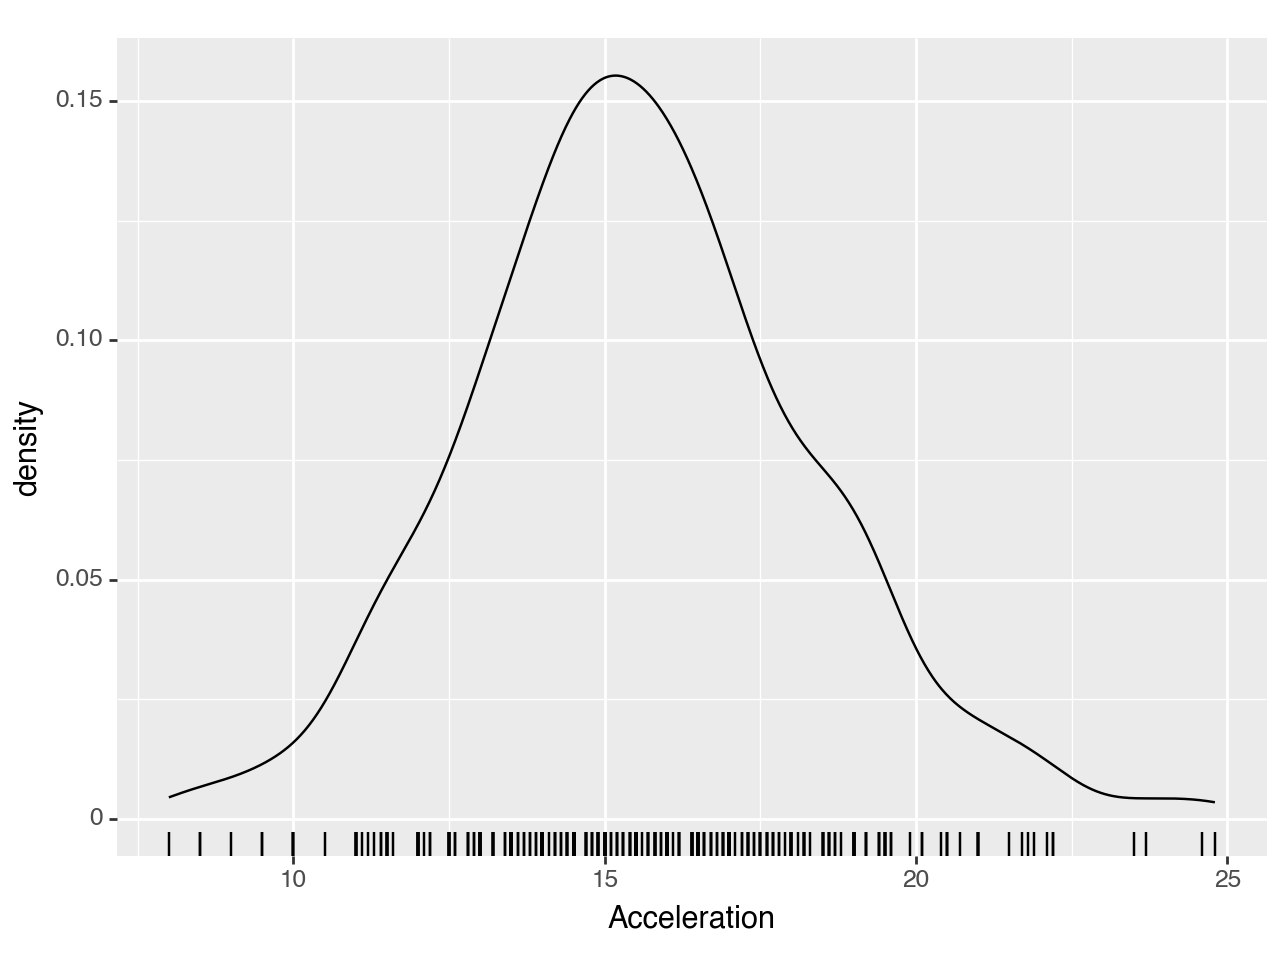

<Figure Size: (640 x 480)>

In [40]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_rug()
 + geom_density()
)

By default all added geoms will inherit the aes mapping of the plot. However, you can also override this by passing a new aes object. In practice this not so often needed though.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 6 rows containing non-finite values.


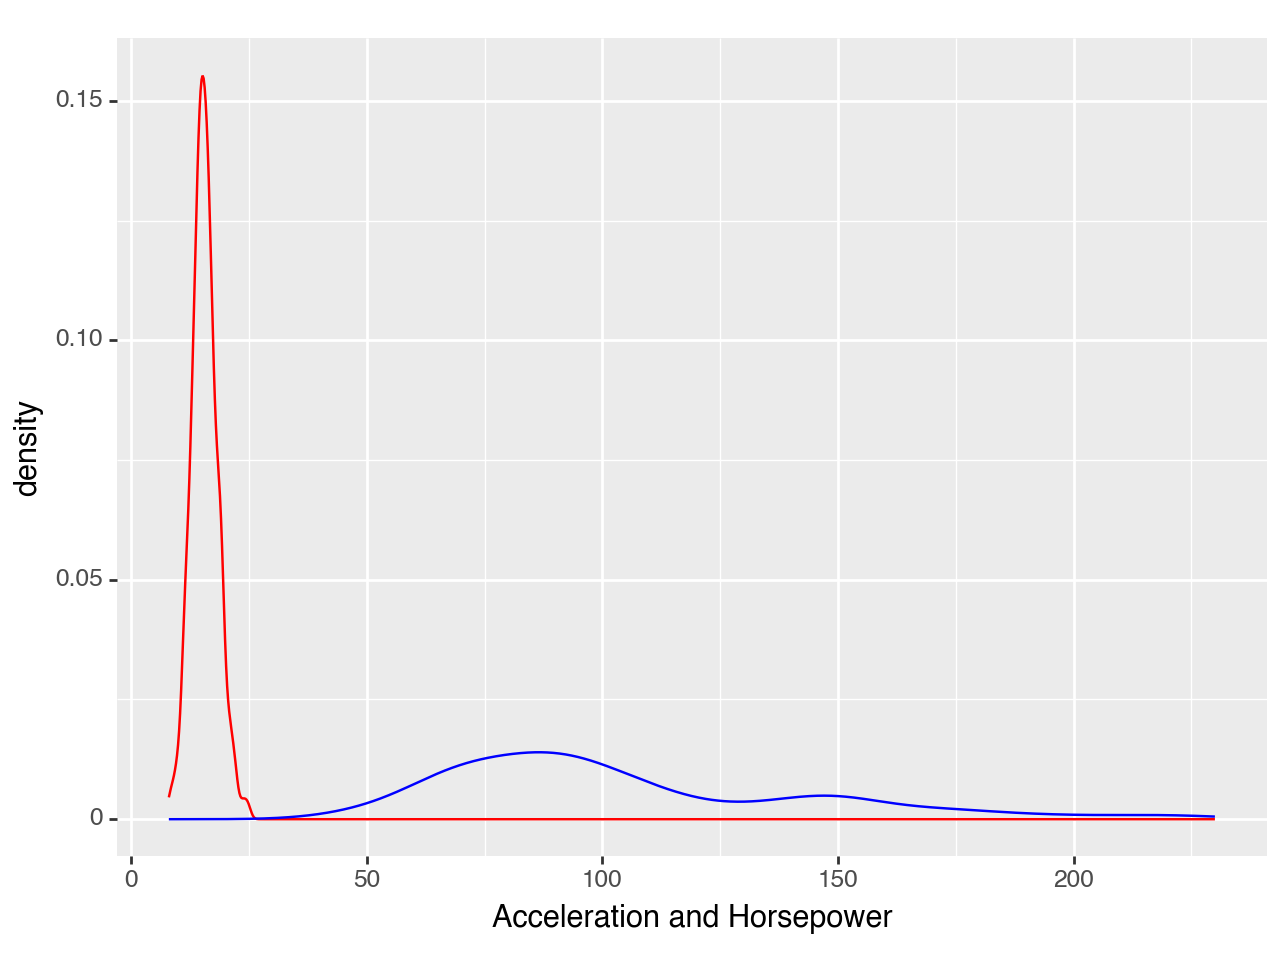

<Figure Size: (640 x 480)>

In [45]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_density(color='red') 
 + geom_density(aes(x='Horsepower'), color='blue') 
 + labs(x='Acceleration and Horsepower')
)

Now that we understood the basics of gglot let's dive into the dataset. First we look at the distribution of a single variable.

# Exploring a single variable

## Histograms

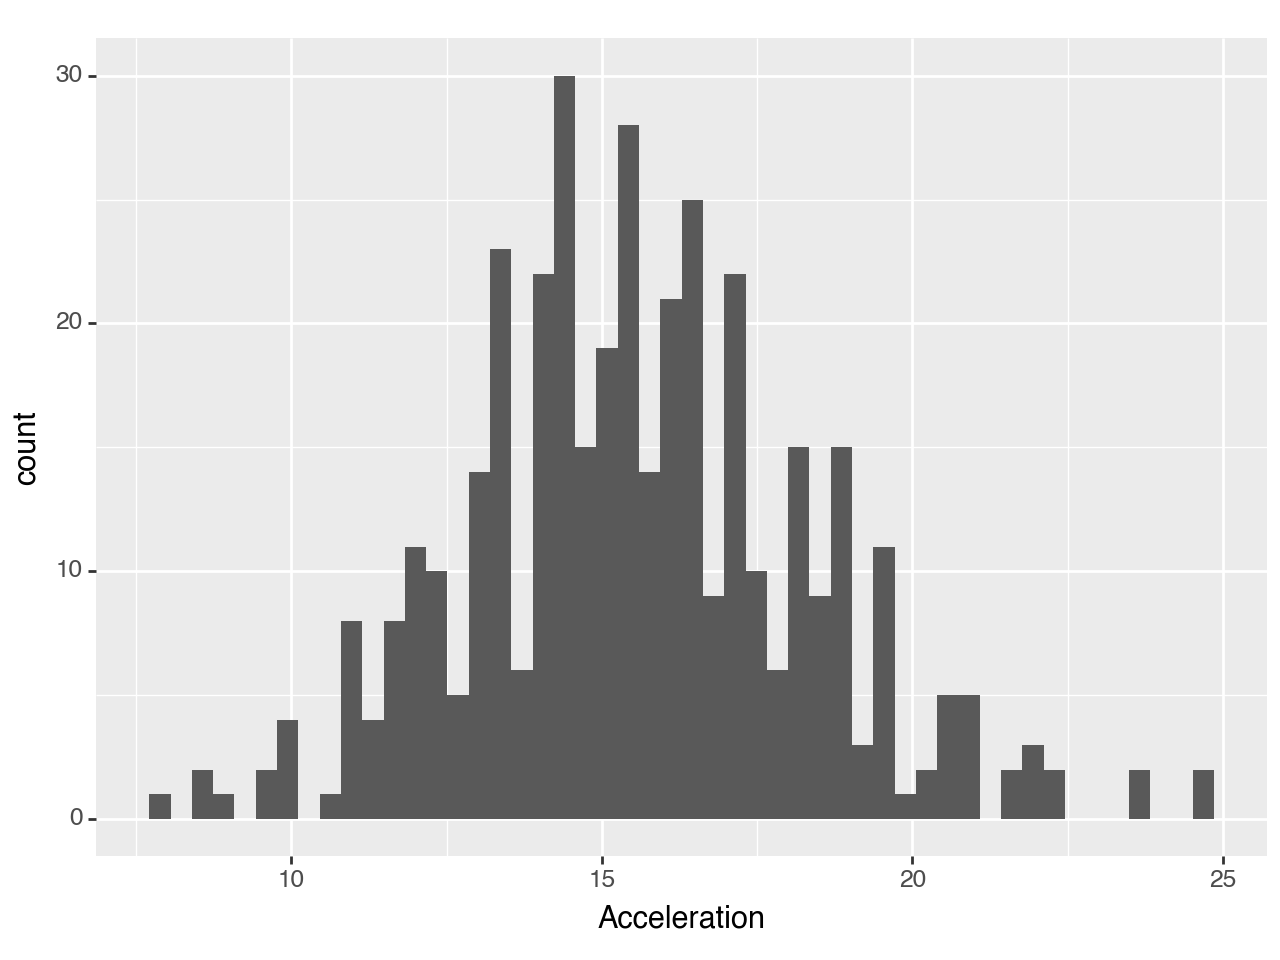

<Figure Size: (640 x 480)>

In [46]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram(bins=50) #or specify binwidth
)

Many geoms are just combinations of less complex geoms and stats. For example a histogram is just a bar plot with a binning statistic.

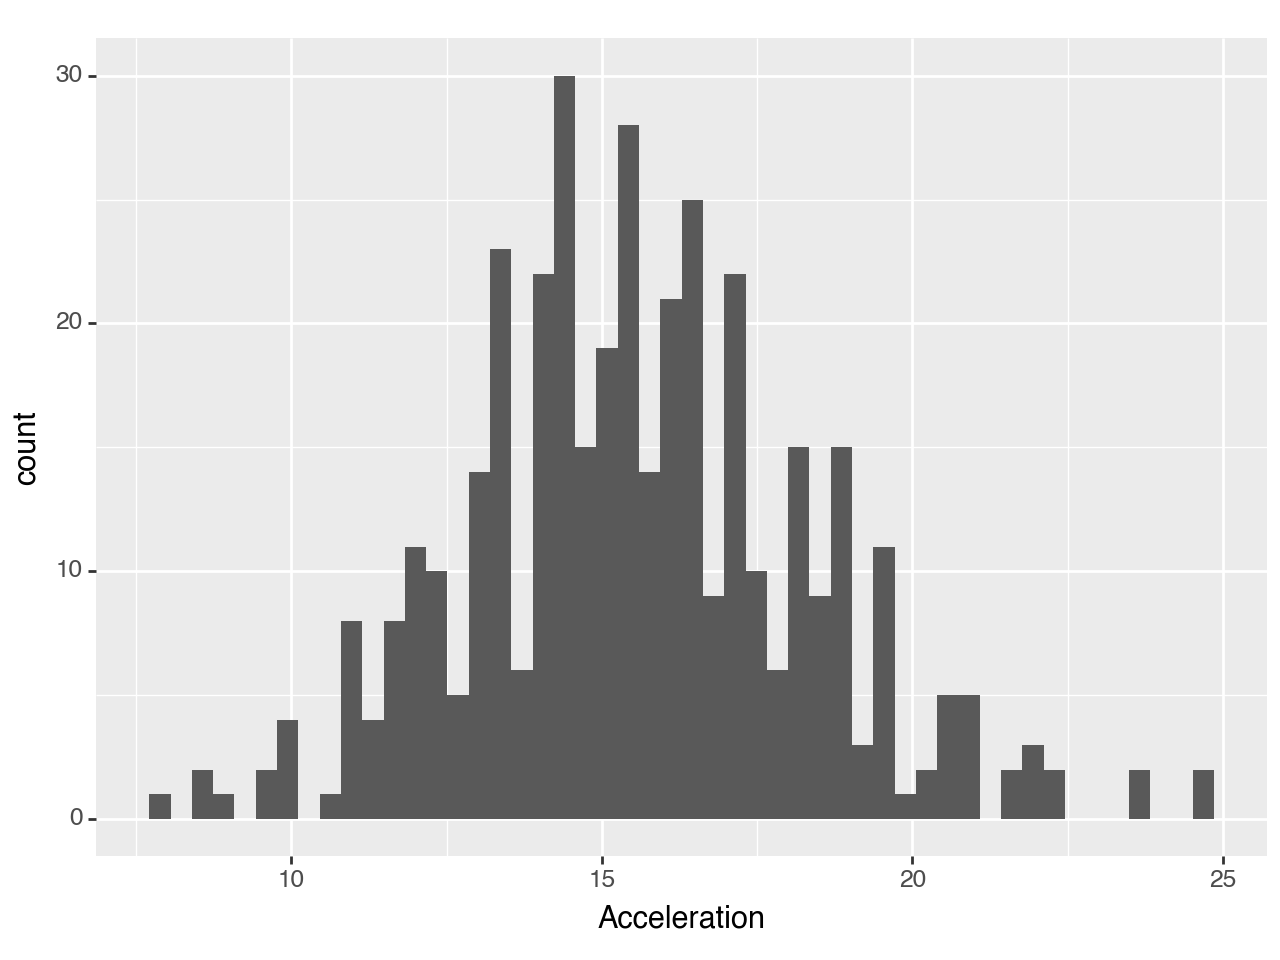

<Figure Size: (640 x 480)>

In [47]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_bar(stat=stat_bin(bins=50))
)

If you want to access variables that are not directly available from the dataset, but rather get calculated by some stat, you can do so by wrapping the variable into "stat()". This way we can get a normalized histogram.

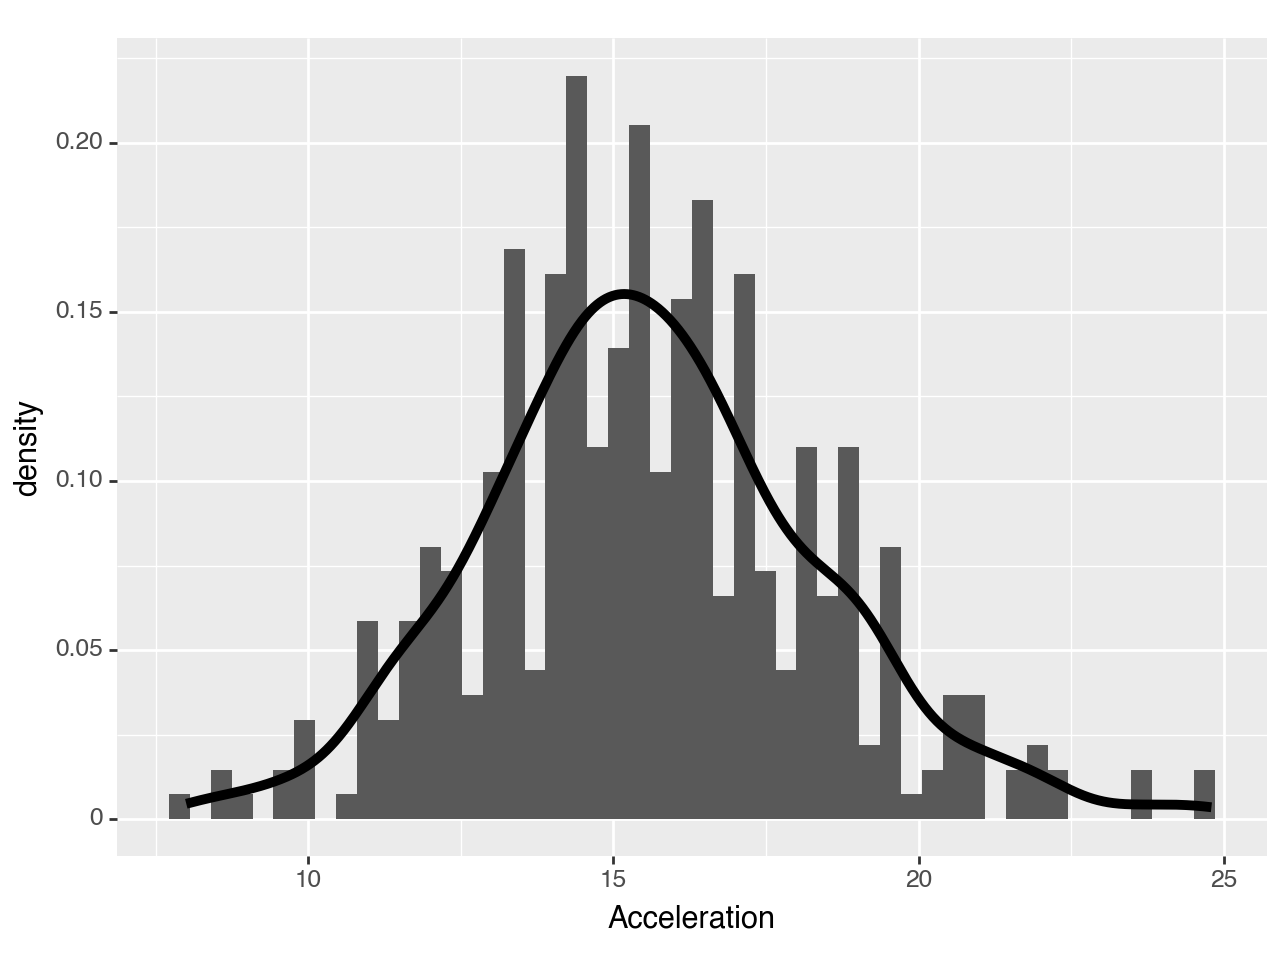

<Figure Size: (640 x 480)>

In [48]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram(aes(y='stat(density)'), bins=50)
 + geom_density(size=2)
)

The strings in the expression can refer to:

- columns in the dataframe
- variables in the namespace
- aesthetic values (columns) calculated by the stat

## Boxplots

For making a boxplot, we need to specify the x variable. If we want to make a boxplot for a single variable, we need to specify some number.

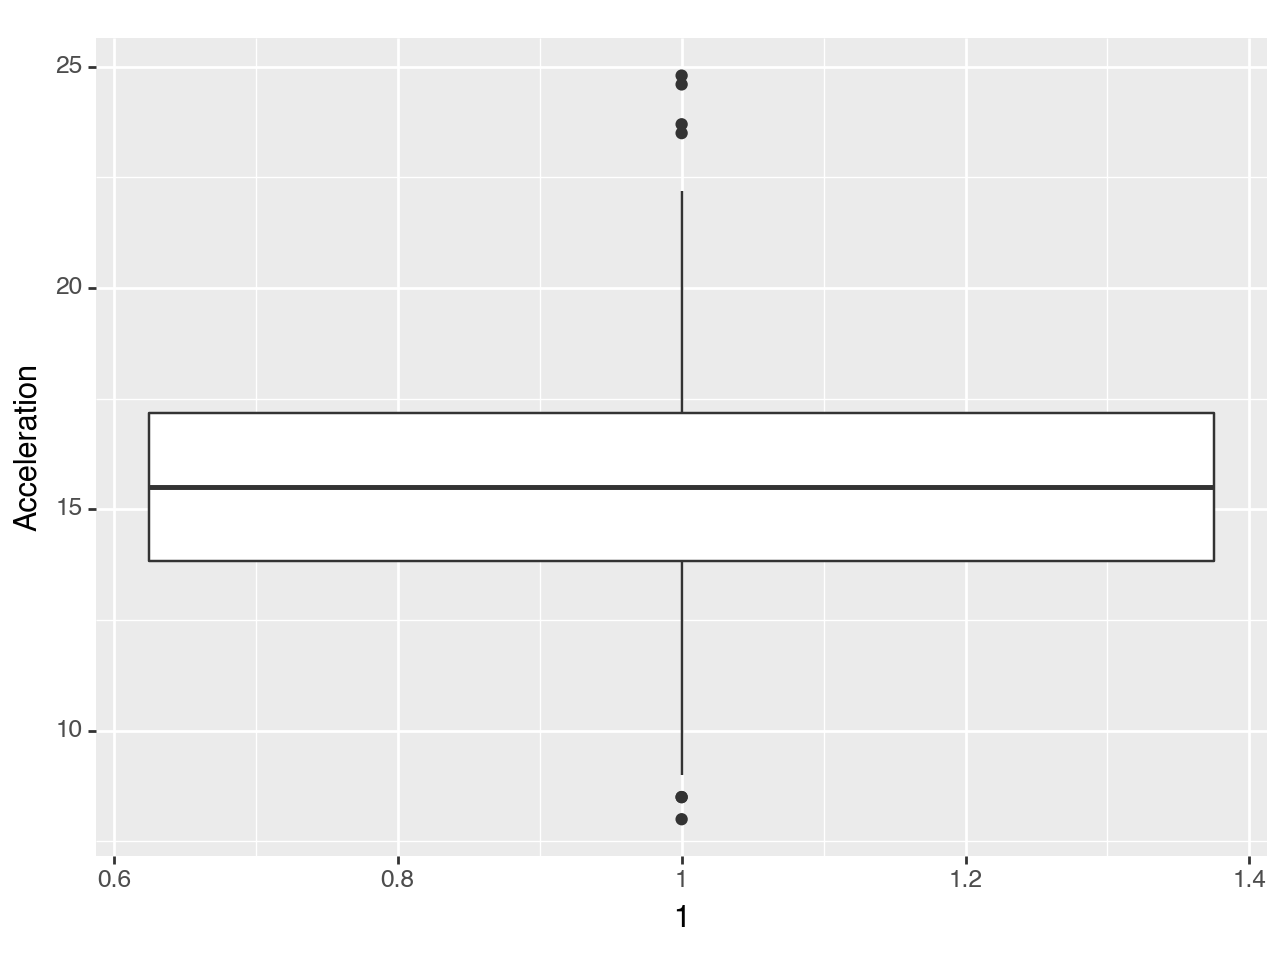

<Figure Size: (640 x 480)>

In [49]:
(ggplot(cars, aes(x=1, y='Acceleration')) 
 + geom_boxplot()
)

### Exercise

For the exercise we will turn to the barley dataset. The description on vega_datasets states

> The result of a 1930s agricultural experiment in Minnesota, this dataset contains yields for 10 different varieties of barley at six different sites. It was first published by agronomists F.R. Immer, H.K. Hayes, and L. Powers in the 1934 paper "Statistical Determination of Barley Varietal Adaption." R.A. Fisher's popularized its use in the field of statistics when he included it in his book "The Design of Experiments." Since then it has been used to demonstrate new statistical techniques, including the trellis charts developed by Richard Becker, William Cleveland and others in the 1990s.

In [51]:
!pip install vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [52]:
import vega_datasets

In [53]:
barley = vega_datasets.data.barley()
barley.head()

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids


Make a histogram of the yield for all observations. Make the bins 5 units wide. Expand the cell below to see the solution

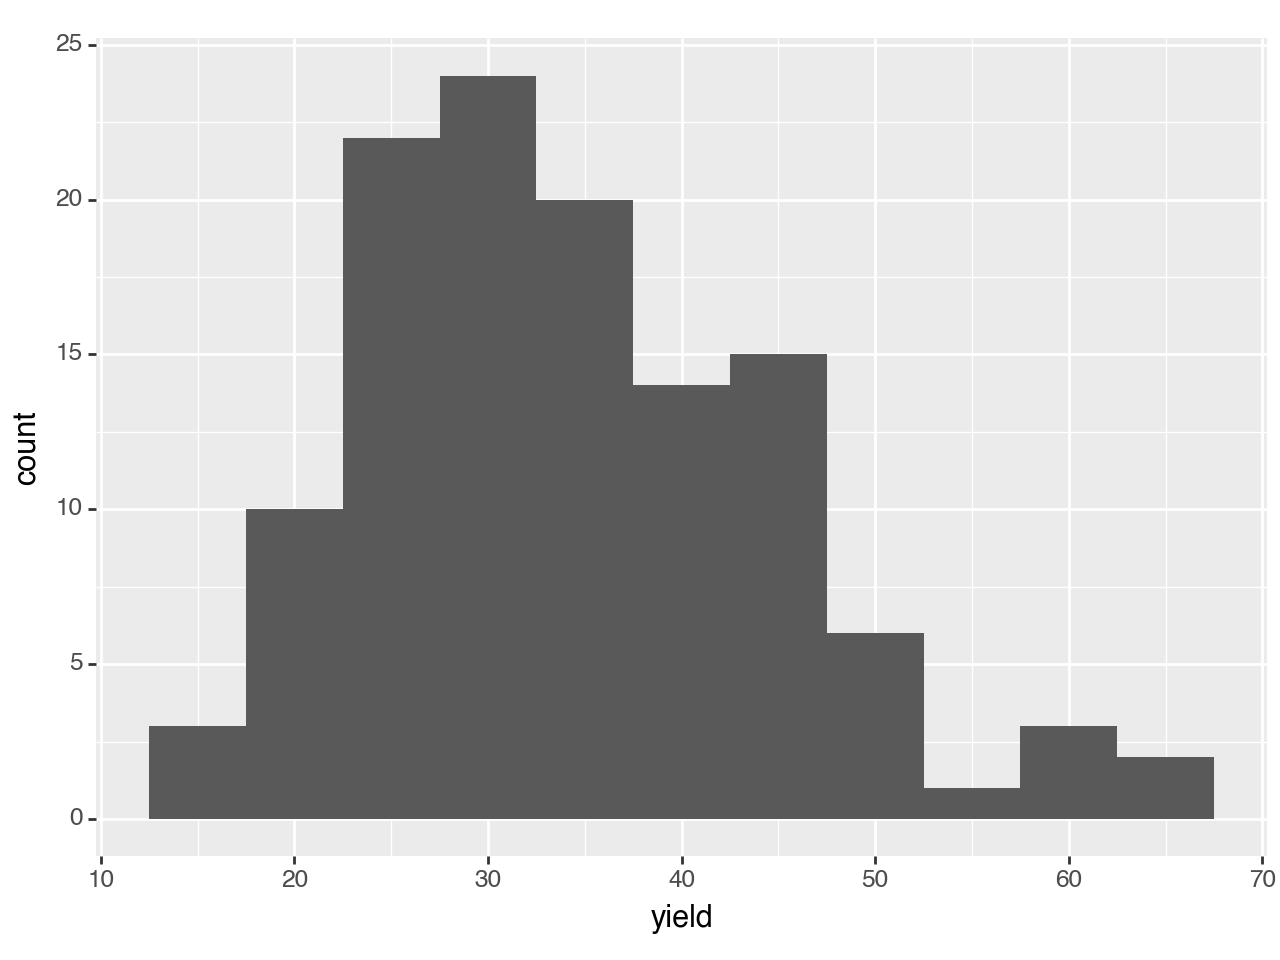

<Figure Size: (640 x 480)>

In [54]:
(ggplot(barley, aes(x='yield')) 
+ geom_histogram(binwidth=5)
)